In [2]:
!pip install mplhep --user

     |████████████████████████████████| 5.8 MB 8.8 MB/s eta 0:00:01


In [1]:
import subprocess
from subprocess import Popen
import sys
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import statistics
import mplhep as hep
#cudapath = '/data2/user/pfudolig/pixeltrack-standalone/results/cuda_results/'

In [4]:
user_output = pd.read_csv('Results/4cuda_20s_10000e.csv')

In [25]:
def plotThroughput(dataframe,std='NA'):
    #Plot throughput as a function of amount of streams
    df_streams = dataframe['nStreams']
    df_throughput = dataframe['throughput']
    streams_pick = [df_streams[0],df_streams[1],df_streams[3],df_streams[7],df_streams[11],df_streams[15],df_streams[19]]
    thru_std = dataframe['tput_std']
    std_pick = [thru_std[0],thru_std[1],thru_std[3],thru_std[7],thru_std[11],thru_std[15],thru_std[19]]
    thru_ave = dataframe['tput_ave']
    ave_pick = [thru_ave[0],thru_ave[1],thru_ave[3],thru_ave[7],thru_ave[11],thru_ave[15],thru_ave[19]]
    events_val = dataframe['nEvents'].iat[0]

    if std == 'NA':
        plt.style.use(hep.style.CMS)
        plt.figure(figsize = (20,10))
        plt.plot(df_streams,df_throughput,'o',linestyle='solid',label='Cuda')
        plt.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
        plt.xticks(streams_pick)
        plt.xlabel('Number of Threads/Streams')
        plt.ylabel('Throughput (events/s)') 
        plt.title('Throughput vs. Number of Streams')
        plt.show() 
        plt.savefig(cudapath + 'cudathru_' + str(max(df_streams)) + 's_' + str(events_val) + 'e.png')
        plt.close()

    if std == 'std':
        plt.style.use(hep.style.CMS)
        plt.figure(figsize = (20,10))
        plt.plot(streams_pick,ave_pick,'ro-',linestyle='solid',label='Cuda')
        plt.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
        plt.xticks(streams_pick,fontsize=20)
        plt.errorbar(streams_pick,ave_pick,yerr=std_pick,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        plt.xlabel('Number of Threads/Streams',fontsize=20)
        plt.ylabel('Throughput (events/s)',fontsize=20) 
        plt.title('PixelTrack-Standalone Performance',fontsize=30) 
        plt.savefig('Results/4ave_cudathru_' + str(max(df_streams)) + 's_' + str(events_val) + 'e.png')
        plt.show() 
        #plt.close()

/tmp/ipykernel_882/2069627570.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(streams_pick,ave_pick,'ro-',linestyle='solid',label='Cuda')


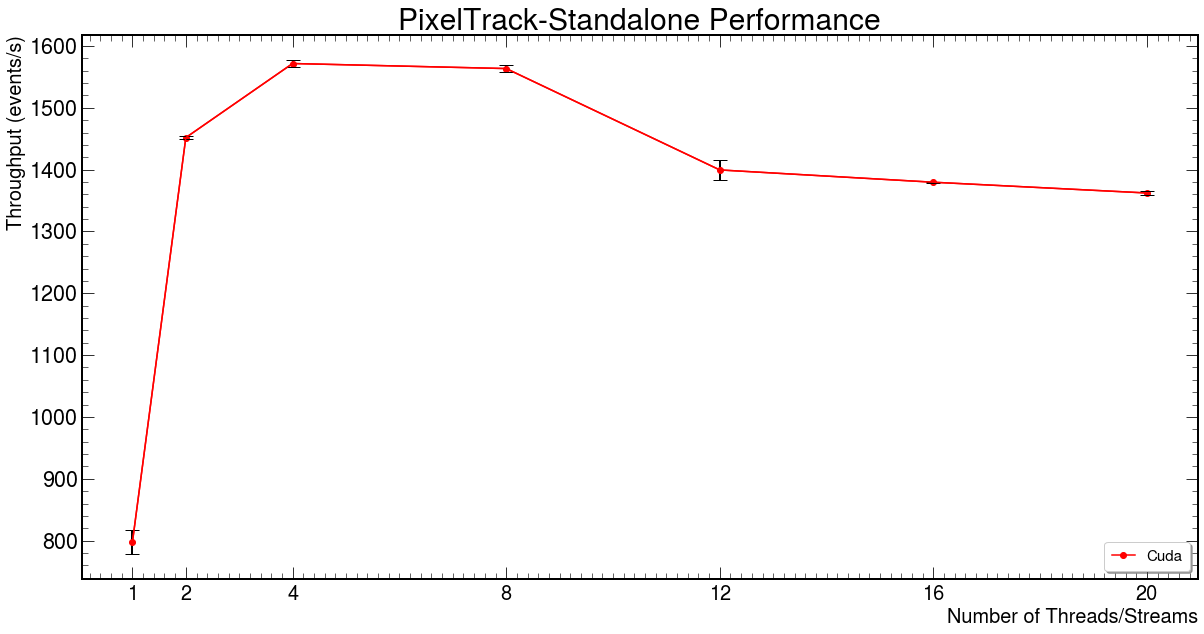

In [26]:
plotThroughput(user_output,std='std')